<a href="https://colab.research.google.com/github/runminghuang/Transfer_Learning_for_Stock_Prediction/blob/data-processing/Data_processing_signature_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import iisignature
import pandas as pd
from sklearn.decomposition import PCA

## Data Import

In [5]:
x_train = pd.read_csv("datasets/x_train.csv")
y_train = pd.read_csv("datasets/y_train.csv")
x_test = pd.read_csv("datasets/x_test.csv")
y_test = pd.read_csv("datasets/test_rand.csv")

In [6]:
x_train.head()

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
0,0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,...,0.059459,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937
1,1,0,3,43,15,6,104,0.003984,NaN,-0.090580,...,0.015413,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN
2,2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,...,0.008964,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868
3,3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,...,-0.031769,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458
4,4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,...,-0.038461,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806


In [7]:
# Load stock data
df = x_train.sort_values(by=['STOCK', 'DATE']).reset_index(drop=True)
df.head()

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
0,2377,1,0,37,12,5,94,-0.005967,0.136699,0.009031,...,-0.009219,-0.493354,-0.007660,-0.585497,-0.001063,-0.351363,0.005127,-0.324675,-0.019275,-0.291751
1,5198,4,0,37,12,5,94,0.001348,-0.269520,0.011100,...,-0.000762,-0.313575,0.007867,0.071338,0.007733,-0.405243,-0.003276,-0.424336,-0.010489,-0.050591
2,8017,5,0,37,12,5,94,-0.014405,0.192655,0.003614,...,0.002742,-0.367499,-0.005843,-0.405562,0.002930,-0.315935,0.010462,-0.474957,-0.003541,-0.260130
3,20826,11,0,37,12,5,94,0.008938,0.430916,0.002662,...,0.009097,0.023598,0.011266,0.079711,0.019038,-0.230167,-0.000287,-0.312123,0.008682,-0.226628
4,33843,21,0,37,12,5,94,-0.006523,-0.060371,-0.007632,...,-0.014461,-0.337686,-0.007224,-0.161117,-0.001461,-0.095494,0.012667,0.471895,-0.038752,1.532045


plan：
1. NaN -> 0 or Mean of column of the stock
2. Feature Engineering: 40 rtn and vol dimension -> 10 rtn and vol dim (PCA or other means)  Or, use 1day 5day 20day rtn and vol
3. For each row, calculate the sig (dim=11, order 3)
4. Feature Engineering on the Sig outcome: 1464 dim -> 15 dim (Ridge regression/ Lasso)

## Data Preprocess

In [8]:
# Fill NaN with 0
df = df.fillna(0)
df.head()

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,...,RET_16,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20
0,2377,1,0,37,12,5,94,-0.005967,0.136699,0.009031,...,-0.009219,-0.493354,-0.007660,-0.585497,-0.001063,-0.351363,0.005127,-0.324675,-0.019275,-0.291751
1,5198,4,0,37,12,5,94,0.001348,-0.269520,0.011100,...,-0.000762,-0.313575,0.007867,0.071338,0.007733,-0.405243,-0.003276,-0.424336,-0.010489,-0.050591
2,8017,5,0,37,12,5,94,-0.014405,0.192655,0.003614,...,0.002742,-0.367499,-0.005843,-0.405562,0.002930,-0.315935,0.010462,-0.474957,-0.003541,-0.260130
3,20826,11,0,37,12,5,94,0.008938,0.430916,0.002662,...,0.009097,0.023598,0.011266,0.079711,0.019038,-0.230167,-0.000287,-0.312123,0.008682,-0.226628
4,33843,21,0,37,12,5,94,-0.006523,-0.060371,-0.007632,...,-0.014461,-0.337686,-0.007224,-0.161117,-0.001461,-0.095494,0.012667,0.471895,-0.038752,1.532045


## Feature Engineering Methods

### VIF (variance_inflation_factor)
VIF > 10：strong colinearity, considering remove this feature

VIF > 5：mild colinearity, need further research

VIF ≈ 1：feature independence is good

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
ret_cols = [col for col in df.columns if col.startswith('RET_')]
vol_cols = [col for col in df.columns if col.startswith('VOLUME_')]

features_for_vif = df[ret_cols + vol_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]
vif_data.head()


,feature,VIF
0,RET_1,1.017835
1,RET_2,1.060485
2,RET_3,1.102149
3,RET_4,1.031332
4,RET_5,1.054145


## Pearson Correlation Matrix

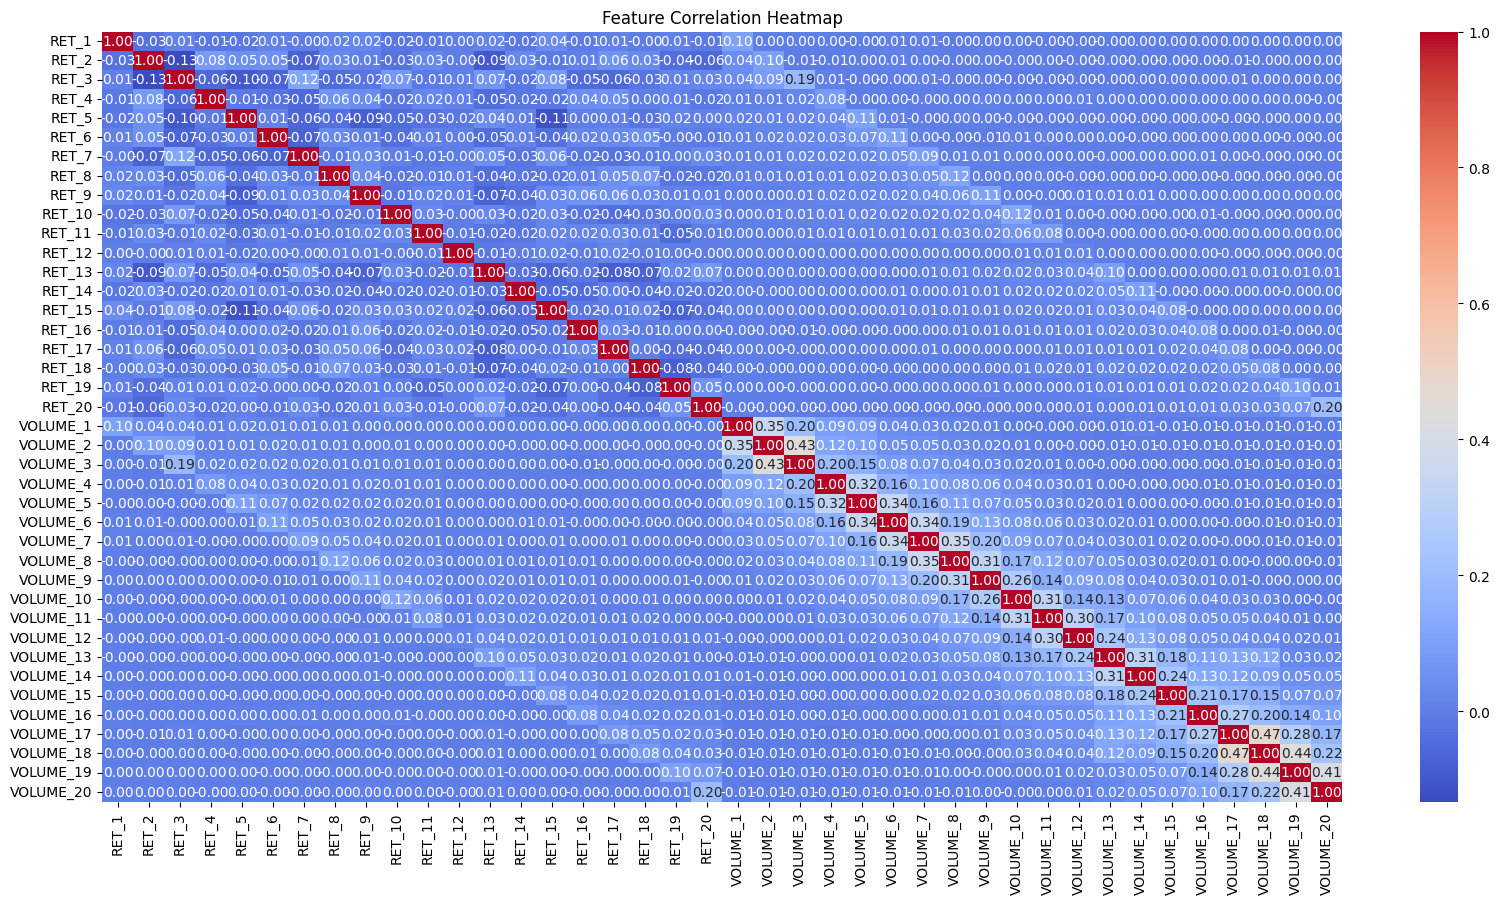

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[ret_cols + vol_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Based on the VIF and Correlation matrix, we have several findings:

    1. VIF of VOLUME and RET data are close to 1, which means that COL_i (VOLUME_i) and COL_j(VOLUME_j) using VIF to explain the correlation correlation generally pass the test, basically will not reduce the independence and marginal contribution to the further model.
    1. RET data has less colinearity issue compared with VOLUME data
    2. The closer j to i, the higher correlation between VOLUME_i and VOLUME_j
    3. Normally, when |j-i| <= 5, the colinearity and correlation problem arise.

Therefore, we choose to use [RET_1, RET_5, RET_10, RET_15, RET_20], [VOLUME_1, VOLUME_5, VOLUME_10, VOLUME_15, VOLUME_20] as our simplified data.

In [11]:
other_cols = ['ID', 'DATE', 'STOCK', 'INDUSTRY', 'INDUSTRY_GROUP', 'SECTOR', 'SUB_INDUSTRY']
ret_cols = ['RET_1', 'RET_5', 'RET_10','RET_15','RET_20']
vol_cols = ['VOLUME_1', 'VOLUME_5', 'VOLUME_10','VOLUME_15','VOLUME_20']
df_featured = df[other_cols + ret_cols + vol_cols]
df_featured.head()

,ID,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,RET_5,RET_10,RET_15,RET_20,VOLUME_1,VOLUME_5,VOLUME_10,VOLUME_15,VOLUME_20
0,2377,1,0,37,12,5,94,-0.005967,0.012739,-0.006094,-0.015148,-0.019275,0.136699,0.746002,-0.268285,-0.382067,-0.291751
1,5198,4,0,37,12,5,94,0.001348,0.005654,-0.002856,-0.006286,-0.010489,-0.269520,-0.379779,-0.405866,-0.249143,-0.050591
2,8017,5,0,37,12,5,94,-0.014405,0.002700,0.007140,-0.002735,-0.003541,0.192655,0.001736,-0.229625,-0.209810,-0.260130
3,20826,11,0,37,12,5,94,0.008938,-0.002252,0.007473,0.005980,0.008682,0.430916,-0.130800,-0.326320,0.032272,-0.226628
4,33843,21,0,37,12,5,94,-0.006523,-0.006111,-0.009156,-0.000654,-0.038752,-0.060371,-0.503069,-0.471997,-0.510826,1.532045


## Signature Computing

In [12]:
# Define signature computation parameters
n = 3  # Signature order
features = ['DATE'] + ret_cols + vol_cols
d = len(features)
signature_data = []

# Sliding window parameters
W = 5   # Window size (number of time steps per sub-path)
S = 1    # Step size (how much we shift the window each time)

#### Test: Only select the first stock

In [13]:
# Select the first stock
ID = df_featured['ID'].unique()[0]
first_stock_name = df_featured['STOCK'].unique()[0]  # Get the first stock name
first_stock_df = df_featured[df_featured['STOCK'] == first_stock_name].sort_values(by="DATE")  # Ensure chronological order

# Drop NaN values from selected features
first_stock_df = first_stock_df.dropna(subset=features)

# Ensure at least W rows exist before computing the signature
if len(first_stock_df) < W:
    raise ValueError(f"Not enough data for stock {first_stock_name} to compute signatures.")

# Convert to NumPy array for faster processing
path_data = first_stock_df[features].values  # Shape: (T, d)

# Precompute signature transformation for efficiency
sig_transform = iisignature.prepare(d, n)

# Prepare storage for signature data
signature_data = []

# Apply sliding window
for start in range(0, len(path_data) - W + 1, S):
    end = start + W
    window_path = path_data[start:end]  # Extract sub-path

    # Compute the signature for this window
    signature = iisignature.sig(window_path, n)

    # Store results with metadata
    signature_data.append({
        'ID': ID,
        'Stock': first_stock_name,
        'Industry': first_stock_df.iloc[start]["INDUSTRY"].astype(int),
        'Industry_Group': first_stock_df.iloc[start]["INDUSTRY_GROUP"].astype(int),
        'Sub_Industry': first_stock_df.iloc[start]["SUB_INDUSTRY"].astype(int),
        'Sector': first_stock_df.iloc[start]["SECTOR"].astype(int),
        'Start Time': first_stock_df.iloc[start]["DATE"].astype(int),
        'End Time': first_stock_df.iloc[end - 1]["DATE"].astype(int),
        **{f'Sig_{i}': signature[i] for i in range(len(signature))}
    })

# Convert to DataFrame and display
signature_df = pd.DataFrame(signature_data)
signature_df.head()

,ID,Stock,Industry,Industry_Group,Sub_Industry,Sector,Start Time,End Time,Sig_0,Sig_1,...,Sig_1453,Sig_1454,Sig_1455,Sig_1456,Sig_1457,Sig_1458,Sig_1459,Sig_1460,Sig_1461,Sig_1462
0,2377,0,37,12,94,5,1,21,20.0,-0.000556,...,-0.008964,-0.002326,-0.009416,-0.003678,-0.027091,-0.280932,-0.220834,-0.083236,-0.310192,1.011061
1,2377,0,37,12,94,5,4,22,18.0,-0.006075,...,-0.004898,0.003223,0.003468,-0.001965,-0.002002,-0.218490,-0.046288,0.018791,-0.105441,-0.014357
2,2377,0,37,12,94,5,5,28,23.0,0.032978,...,-0.007420,0.004623,0.004590,-0.003163,-0.003760,-0.323834,-0.071490,0.026162,-0.162159,0.000320
3,2377,0,37,12,94,5,11,32,21.0,0.010199,...,-0.006948,0.004388,0.004181,-0.002922,-0.003611,-0.306219,-0.066714,0.027582,-0.152259,-0.001297
4,2377,0,37,12,94,5,21,39,18.0,0.016542,...,0.025069,0.006029,-0.056126,0.020099,0.031582,0.265190,0.493580,0.877977,0.007644,-1.134555


#### Compute signatures for all stocks

In [14]:
signature_data = []

# Process each stock separately
for stock_id, stock_df in df_featured.groupby("STOCK"):
    stock_df = stock_df.sort_values(by="DATE")  # Ensure chronological order

    # Drop NaN values in selected features
    stock_df = stock_df.dropna(subset=features)

    # Ensure at least W rows exist before computing the signature
    if len(stock_df) < W:
        print(f"Skipping stock {stock_id}: Not enough data for sliding window computation.")
        continue

    # Convert to NumPy array for faster processing
    path_data = stock_df[features].values  # Shape: (T, d)

    # Precompute signature transformation for efficiency
    sig_transform = iisignature.prepare(d, n)

    # Apply sliding window
    for start in range(0, len(path_data) - W + 1, S):
        end = start + W
        window_path = path_data[start:end]  # Extract sub-path
        end_ID = stock_df.iloc[end - 1]["ID"]

        # Compute the signature for this window
        signature = iisignature.sig(window_path, n)

        # Store results with metadata
        signature_data.append({
            'ID': end_ID,
            'Stock': stock_id,
            'Industry': stock_df.iloc[start]["INDUSTRY"].astype(int),
            'Industry_Group': stock_df.iloc[start]["INDUSTRY_GROUP"].astype(int),
            'Sub_Industry': stock_df.iloc[start]["SUB_INDUSTRY"].astype(int),
            'Sector': stock_df.iloc[start]["SECTOR"].astype(int),
            'Start Time': stock_df.iloc[start]["DATE"].astype(int),
            'End Time': stock_df.iloc[end - 1]["DATE"].astype(int),
        **{f'Sig_{i}': signature[i] for i in range(len(signature))}
    })


# Convert to DataFrame and display


Skipping stock 352: Not enough data for sliding window computation.
Skipping stock 733: Not enough data for sliding window computation.
Skipping stock 750: Not enough data for sliding window computation.
Skipping stock 757: Not enough data for sliding window computation.
Skipping stock 823: Not enough data for sliding window computation.
Skipping stock 883: Not enough data for sliding window computation.
Skipping stock 1057: Not enough data for sliding window computation.
Skipping stock 1144: Not enough data for sliding window computation.
Skipping stock 1473: Not enough data for sliding window computation.
Skipping stock 1487: Not enough data for sliding window computation.
Skipping stock 1576: Not enough data for sliding window computation.
Skipping stock 1602: Not enough data for sliding window computation.
Skipping stock 1615: Not enough data for sliding window computation.
Skipping stock 1679: Not enough data for sliding window computation.
Skipping stock 1736: Not enough data for

In [15]:
signature_data = []
feature_keys = None  # store the feature names, avoid recomputing

# Process each stock separately
for stock_id, stock_df in df_featured.groupby("STOCK"):
    stock_df = stock_df.sort_values(by="DATE")  # Ensure chronological order

    # Drop NaN values in selected features
    stock_df = stock_df.dropna(subset=features)

    # Ensure at least W rows exist before computing the signature
    if len(stock_df) < W:
        print(f"Skipping stock {stock_id}: Not enough data for sliding window computation.")
        continue

    # Convert to NumPy array for faster processing
    path_data = stock_df[features].values  # Shape: (T, d)

    # Precompute signature transformation for efficiency
    sig_transform = iisignature.prepare(d, n)

    # Apply sliding window
    for start in range(0, len(path_data) - W + 1, S):
        end = start + W
        window_path = path_data[start:end]  # Extract sub-path
        end_ID = stock_df.iloc[end - 1]["ID"]

        # Compute the signature for this window
        signature = iisignature.sig(window_path, n)

        # Define NumPy array for storing the data row
        data_row = [
            end_ID,
            stock_id,
            int(stock_df.iloc[start]["INDUSTRY"]),
            int(stock_df.iloc[start]["INDUSTRY_GROUP"]),
            int(stock_df.iloc[start]["SUB_INDUSTRY"]),
            int(stock_df.iloc[start]["SECTOR"]),
            int(stock_df.iloc[start]["DATE"]),
            int(stock_df.iloc[end - 1]["DATE"]),
        ] + list(signature)

        signature_data.append(data_row)
        
        # Store feature names (only on first iteration)
        if feature_keys is None:
            feature_keys = ["ID", "Stock", "Industry", "Industry_Group", "Sub_Industry", 
                            "Sector", "Start Time", "End Time"] + [f"Sig_{i}" for i in range(len(signature))]


Skipping stock 352: Not enough data for sliding window computation.
Skipping stock 733: Not enough data for sliding window computation.
Skipping stock 750: Not enough data for sliding window computation.
Skipping stock 757: Not enough data for sliding window computation.
Skipping stock 823: Not enough data for sliding window computation.
Skipping stock 883: Not enough data for sliding window computation.
Skipping stock 1057: Not enough data for sliding window computation.
Skipping stock 1144: Not enough data for sliding window computation.
Skipping stock 1473: Not enough data for sliding window computation.
Skipping stock 1487: Not enough data for sliding window computation.
Skipping stock 1576: Not enough data for sliding window computation.
Skipping stock 1602: Not enough data for sliding window computation.
Skipping stock 1615: Not enough data for sliding window computation.
Skipping stock 1679: Not enough data for sliding window computation.
Skipping stock 1736: Not enough data for

In [16]:
print(signature_data[0])

[33843.0, 0, 37, 12, 94, 5, 1, 21, 20.0, -0.0005558124262107032, -0.0188498011515871, -0.003062056392436098, 0.0144939589800323, -0.019477489574318097, -0.19706974539994704, -1.2490709753928844, -0.2037117377284275, -0.1287587734735786, 1.8237960041681422, 200.0, -0.11267318690759592, -0.11351375564523299, -0.20726099734783823, -0.012785344221048399, -0.5884540618346006, -4.693198337473562, -6.86514864370662, -2.4515494810207135, -6.114845860127488, 26.242967295109075, 0.10155693838338184, 1.5446372656509452e-07, -6.79548608002869e-05, -0.0001119989418566211, 1.1000168230064234e-05, -0.000272559074401903, -0.004499572693613127, -0.007431144768301772, -0.0019599714218984333, -0.002649610605935688, 0.013725631515202756, -0.263482267386509, 7.843181451193984e-05, 0.00017765750172718718, 0.00018014765584135558, -5.8612782909103725e-05, 0.0005590263487410309, 0.0028130098325519284, 0.00867932347284639, 0.0026534773221328395, 0.0053521872768677705, -0.029237042146971034, 0.14601986949911627,

In [17]:
# transform to NumPy array like
signature_np = np.array(signature_data, dtype=np.float64)

In [18]:
# save as .npz
np.savez_compressed("x_train.npz", X=signature_np, feature_names=np.array(feature_keys))

In [19]:
data = np.load("x_train.npz")
X_train = data["X"]
feature_names = data["feature_names"]
print(X_train.shape, feature_names)

(397319, 1471) ['ID' 'Stock' 'Industry' ... 'Sig_1460' 'Sig_1461' 'Sig_1462']
